**Objective:**
To analyze and classify Amazon AWS software reviews using NLP techniques and machine learning models. The goal is to extract insights from review text and predict sentiments or helpfulness efficiently.

#### Import libraries 

In [1]:
import pandas as pd
import numpy as np
import os
import re
import random

## 1.Load dataset

In [2]:
df = pd.read_csv(r"C:\Users\NEELAM SUSHMITHA\OneDrive\Documents\RAMANASOFT INTERNSHIP\aws_review_sofware_dataset (1).csv",nrows=1000)

#### a.Data Exploration or understanding the data

In [3]:
df.columns  # all column names of a DataFrame df

Index(['Unnamed: 0', 'overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'style', 'reviewerName', 'reviewText', 'summary', 'unixReviewTime',
       'vote', 'image'],
      dtype='object')

In [4]:
df.info()  #  method in pandas gives a concise summary of your DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1000 non-null   int64  
 1   overall         1000 non-null   float64
 2   verified        1000 non-null   bool   
 3   reviewTime      1000 non-null   object 
 4   reviewerID      1000 non-null   object 
 5   asin            1000 non-null   int64  
 6   style           185 non-null    object 
 7   reviewerName    1000 non-null   object 
 8   reviewText      1000 non-null   object 
 9   summary         1000 non-null   object 
 10  unixReviewTime  1000 non-null   int64  
 11  vote            238 non-null    float64
 12  image           5 non-null      object 
dtypes: bool(1), float64(2), int64(3), object(7)
memory usage: 94.9+ KB


In [5]:
df.head(3)           # Quick look at the data

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,0,4.0,True,"03 11, 2014",A240ORQ2LF9LUI,77613252,{'Format:': ' Loose Leaf'},Michelle W,The materials arrived early and were in excell...,Material Great,1394496000,NaN,NaN
1,1,4.0,True,"02 23, 2014",A1YCCU0YRLS0FE,77613252,{'Format:': ' Loose Leaf'},Rosalind White Ames,I am really enjoying this book with the worksh...,Health,1393113600,NaN,NaN
2,2,1.0,True,"02 17, 2014",A1BJHRQDYVAY2J,77613252,{'Format:': ' Loose Leaf'},Allan R. Baker,"IF YOU ARE TAKING THIS CLASS DON""T WASTE YOUR ...",ARE YOU KIDING ME?,1392595200,7.0,NaN


In [6]:
df.describe(include='all')  # For basic statistics

,Unnamed: 0,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
count,1000.000000,1000.000000,1000,1000,1000,1.000000e+03,185,1000,1000,1000,1.000000e+03,238.000000,5
unique,NaN,NaN,2,772,998,NaN,6,932,976,725,NaN,NaN,5
top,NaN,NaN,True,"10 4, 2014",A3QJU4FEN8PQSZ,NaN,{'Format:': ' CD-ROM'},Amazon Customer,Great product,Five Stars,NaN,NaN,['https://images-na.ssl-images-amazon.com/imag...
freq,NaN,NaN,834,4,2,NaN,99,49,4,191,NaN,NaN,1
mean,499.500000,4.034000,NaN,NaN,NaN,7.005156e+08,NaN,NaN,NaN,NaN,1.427407e+09,8.592437,NaN
std,288.819436,1.443928,NaN,NaN,NaN,1.462492e+08,NaN,NaN,NaN,NaN,7.016005e+07,25.505147,NaN
min,0.000000,1.000000,NaN,NaN,NaN,7.761325e+07,NaN,NaN,NaN,NaN,1.185322e+09,2.000000,NaN
25%,249.750000,3.000000,NaN,NaN,NaN,7.638556e+08,NaN,NaN,NaN,NaN,1.410977e+09,2.000000,NaN
50%,499.500000,5.000000,NaN,NaN,NaN,7.638556e+08,NaN,NaN,NaN,NaN,1.440504e+09,3.000000,NaN
75%,749.250000,5.000000,NaN,NaN,NaN,7.638556e+08,NaN,NaN,NaN,NaN,1.475042e+09,6.000000,NaN


#### b. Check for missing values

In [7]:
df.isnull().sum().sort_values(ascending=False)

image             995
style             815
vote              762
Unnamed: 0          0
overall             0
verified            0
reviewTime          0
reviewerID          0
asin                0
reviewerName        0
reviewText          0
summary             0
unixReviewTime      0
dtype: int64

In [8]:
# Drop 'image' column as it's not useful
df.drop(columns=['image'], inplace=True, errors='ignore')

In [9]:
# Optional: Drop 'style' if not using
df.drop(columns=['style'], inplace=True, errors='ignore')

In [10]:
#our project is focused on sentiment analysis and only ~24% of vote values are present, you can safely drop it but:  you can use it as a target for a regression/classification model
# Fill NaNs with 0 (assuming 0 votes if not available)
df["vote"] = df["vote"].fillna(0)

# Optionally convert to int
df["vote"] = df["vote"].astype(int)

#### c. Drop duplicates: Remove duplicate reviews to avoid bias.

In [11]:
df.drop_duplicates(subset=["reviewText"], inplace=True)

#### d. Check review length (for filtering short/noisy reviews)

In [12]:
df["review_length"] = df["reviewText"].apply(lambda x: len(str(x).split()))
df["review_length"].describe()

count     976.000000
mean       75.656762
std       160.286481
min         1.000000
25%         8.000000
50%        25.000000
75%        74.000000
max      2742.000000
Name: review_length, dtype: float64

#### e. Check target column (overall) distribution
This help to build a sentiment classification model.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\NEELAM SUSHMITHA\AppData\Local\Temp\ipykernel_24088\3916921686.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='overall', palette='viridis')


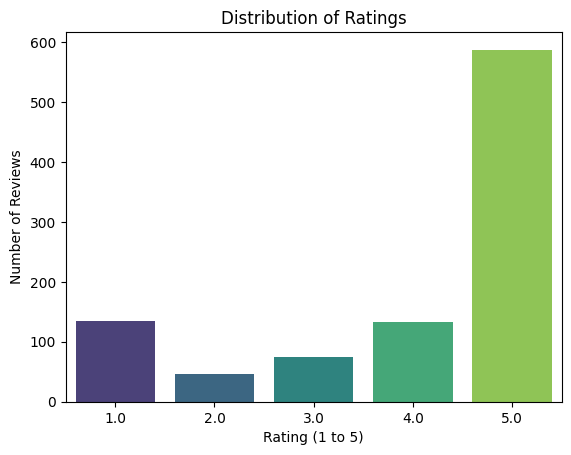

In [14]:
#  Rating Distribution (overall)
sns.countplot(data=df, x='overall', palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating (1 to 5)')
plt.ylabel('Number of Reviews')
plt.show()

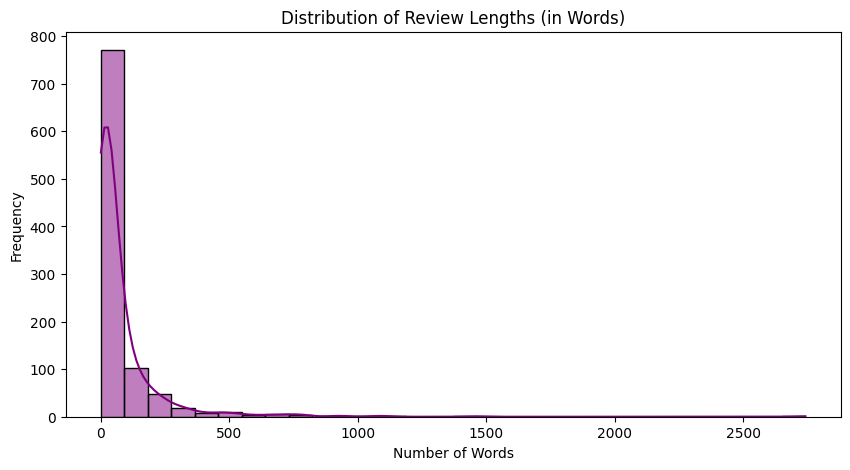

In [15]:
# Review Length Analysis
#Helps detect short/spammy reviews or very long ones.
df['review_length'] = df['reviewText'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10,5))
sns.histplot(df['review_length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Lengths (in Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [16]:
print(df.columns)

Index(['Unnamed: 0', 'overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'review_length'],
      dtype='object')


## 2.Text Preprocessing

Here, we will focus on the reviewText column 

Lowercasing

Remove HTML tags (if any)

Remove special characters and punctuation

Remove numbers (optional)

Remove stopwords

Tokenization

Lemmatization (or stemming)

In [17]:
import nltk

# Download all required NLTK models/resources
nltk.download('punkt')        # For tokenization
nltk.download('stopwords')    # For stopword removal
nltk.download('wordnet')      # For lemmatization
nltk.download('omw-1.4')      # Lemmatizer synonym support

[nltk_data] Downloading package punkt to C:\Users\NEELAM
[nltk_data]     SUSHMITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\NEELAM
[nltk_data]     SUSHMITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\NEELAM
[nltk_data]     SUSHMITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\NEELAM
[nltk_data]     SUSHMITHA\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [18]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup

# Load stopwords & lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ""
    
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove HTML tags
    text = BeautifulSoup(text, "html.parser").get_text()
    
    # 3. Remove special characters
    text = re.sub(r"[^a-z\s]", "", text)
    
    # 4. Tokenize using regex (split on whitespace)
    tokens = re.findall(r'\b\w+\b', text)
    
    # 5. Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # 6. Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # 7. Join tokens back to string
    return " ".join(tokens)


In [19]:
df['clean_reviewText'] = df['reviewText'].apply(preprocess_text)

C:\Users\NEELAM SUSHMITHA\AppData\Local\Temp\ipykernel_24088\1192893029.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "html.parser").get_text()


In [20]:
df['clean_reviewText']

0      material arrived early excellent condition how...
1      really enjoying book worksheet make review goa...
2      taking class dont waste money called book book...
3      book missing page important page couldnt answe...
4      used learnsmart officially say amazing study t...
                             ...                        
995                                    exactly described
996    shipped time easy install hope grandkids teach...
997    bought could add computer reason work disappoi...
998    writing warn people one major issue idea copy ...
999                                          great price
Name: clean_reviewText, Length: 976, dtype: object

C:\Users\NEELAM SUSHMITHA\AppData\Local\Temp\ipykernel_24088\1881588068.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette='mako')


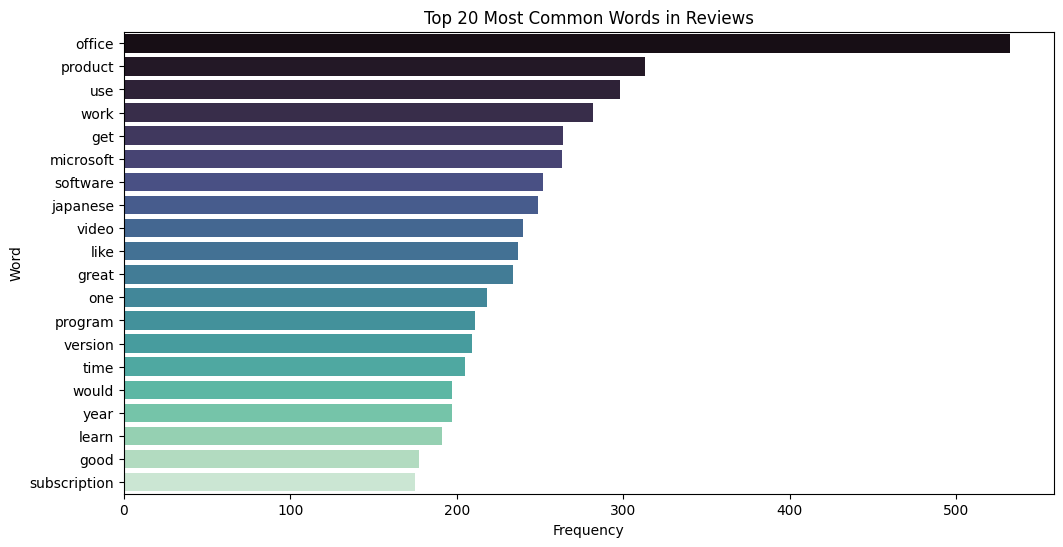

In [21]:
# Top 20 Most Common Words
# Good for understanding review themes (no modeling yet).
from collections import Counter

# Flatten all tokenized words into one list
all_words = " ".join(df['clean_reviewText']).split()

# Count word frequencies
word_freq = Counter(all_words)

# Top 20 most frequent words
common_words = word_freq.most_common(20)

# Plot
words, counts = zip(*common_words)

plt.figure(figsize=(12,6))
sns.barplot(x=list(counts), y=list(words), palette='mako')
plt.title("Top 20 Most Common Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# 3. Convert Ratings to Sentiment Labels (for classification)
To perform sentiment classification, we need to convert the numerical overall rating into sentiment categories:

In [22]:
# Create a New sentiment Column:
def get_sentiment(rating):
    if rating >= 4:
        return "positive"
    elif rating == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["overall"].apply(get_sentiment)

C:\Users\NEELAM SUSHMITHA\AppData\Local\Temp\ipykernel_24088\1572724090.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment", palette="Set2")


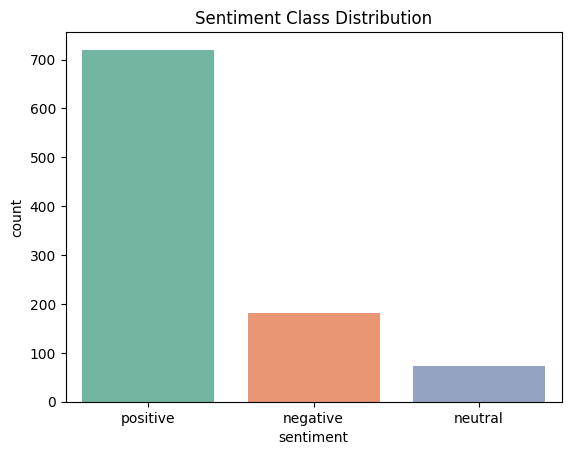

In [23]:
# Class Distribution:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x="sentiment", palette="Set2")
plt.title("Sentiment Class Distribution")
plt.show()

In [24]:
#### Encode Sentiments (for ML models)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['sentiment'])

# Map: {'negative': 0, 'neutral': 1, 'positive': 2}

In [25]:
df['sentiment_encoded'].head()

0    2
1    2
2    0
3    1
4    2
Name: sentiment_encoded, dtype: int32

##  4. Text Vectorization (Feature Extraction)
Raw text must be converted to numerical features so ML models can understand it.   
some of the techniques are:
| Method                 | Description                                   |
| ---------------------- | --------------------------------------------- |
| **Bag of Words (BoW)** | Word frequency matrix                         |
| **TF-IDF**             | Frequency scaled by uniqueness across docs    |
| **Word Embeddings**    | Pre-trained word vectors like Word2Vec, GloVe |
| **Transformer-based**  | BERT/DistilBERT embeddings (advanced)         |


In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Prepare Text & Labels

In [27]:
# X = cleaned review text
X = df['clean_reviewText']

# y = sentiment labels (positive / neutral / negative)
y = df['sentiment']

###  Split into Train and Test Sets

In [28]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

### Convert Text to TF-IDF Vectors

In [29]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

###  Train Logistic Regression Model

In [30]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

####  Model Training
Choose an NLP classifier:
| Model                      | Use Case                                  |
| -------------------------- | ----------------------------------------- |
| Logistic Regression        | Fast, interpretable baseline              |
| Multinomial Naive Bayes    | Very effective for text                   |
| SVM                        | Handles high-dimensional sparse data well |
| Random Forest              | Less common in text, but works            |
| Deep Learning (LSTM, BERT) | For high performance, more compute        |


### Making Predictions

In [31]:
y_pred = model.predict(X_test_tfidf)

#### Model Evaluation

In [32]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7857142857142857

Confusion Matrix:
 [[ 10   0  26]
 [  1   0  14]
 [  1   0 144]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.28      0.42        36
     neutral       0.00      0.00      0.00        15
    positive       0.78      0.99      0.88       145

    accuracy                           0.79       196
   macro avg       0.54      0.42      0.43       196
weighted avg       0.73      0.79      0.72       196



C:\Users\NEELAM SUSHMITHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NEELAM SUSHMITHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NEELAM SUSHMITHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

NOTE: We use TF-IDF to convert the cleaned review text into numbers that show how important each word is. 
Then, we use Logistic Regression to classify the reviews into positive, neutral, or negative sentiment. 
This method is fast and works well for small text datasets like this one.

## Naive Bayes with TF-IDF

In [33]:
from sklearn.naive_bayes import MultinomialNB

In [34]:
# Use same TF-IDF vectors from before
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [35]:
# Predict on Test Data
y_pred_nb = nb_model.predict(X_test_tfidf)

In [36]:
# Evaluate Performance
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.7397959183673469

Confusion Matrix:
 [[  0   0  36]
 [  0   0  15]
 [  0   0 145]]

Classification Report:
               precision    recall  f1-score   support

    negative       0.00      0.00      0.00        36
     neutral       0.00      0.00      0.00        15
    positive       0.74      1.00      0.85       145

    accuracy                           0.74       196
   macro avg       0.25      0.33      0.28       196
weighted avg       0.55      0.74      0.63       196



C:\Users\NEELAM SUSHMITHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NEELAM SUSHMITHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\NEELAM SUSHMITHA\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Final Steps After Model Selection (Logistic Regression)

### 1. Set Up Final Model for Production
Use the best settings — like class_weight='balanced' and tuned TF-IDF.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X = vectorizer.fit_transform(df['clean_reviewText'])
y = df['sentiment']

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Final model with class weights
final_model = LogisticRegression(class_weight='balanced')
final_model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

### 2. Save the Model & Vectorizer

In [38]:
import joblib

# Save model
joblib.dump(final_model, 'final_sentiment_model.pkl')

# Save vectorizer
joblib.dump(vectorizer, 'final_tfidf_vectorizer.pkl')

['final_tfidf_vectorizer.pkl']

### 3. Load & Use for New Predictions

In [39]:
# Load saved model and vectorizer
loaded_model = joblib.load('final_sentiment_model.pkl')
loaded_vectorizer = joblib.load('final_tfidf_vectorizer.pkl')

# New review example
new_review = ["AWS services are too complicated for beginners"]
cleaned = ["aws services are too complicated for beginners"]  # preprocessed version
X_new = loaded_vectorizer.transform(cleaned)

# Predict
prediction = loaded_model.predict(X_new)
print("Predicted Sentiment:", prediction[0])

Predicted Sentiment: positive


In [40]:
reviews = [
    "I love the AWS cloud services!",
    "The UI is not user-friendly at all.",
    "Pricing is confusing for startups.",
    "Great support and scalability."
]
# Preprocess all reviews
cleaned_reviews = [r.lower() for r in reviews]  # Use real preprocessing
X_batch = loaded_vectorizer.transform(cleaned_reviews)
predictions = loaded_model.predict(X_batch)

for review, pred in zip(reviews, predictions):
    print(f"Review: {review} --> Sentiment: {pred}")

Review: I love the AWS cloud services! --> Sentiment: positive
Review: The UI is not user-friendly at all. --> Sentiment: positive
Review: Pricing is confusing for startups. --> Sentiment: positive
Review: Great support and scalability. --> Sentiment: positive
